## Imports

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text

from PIL import Image
import urllib
import os
import math

As opposed to other examples, from now on I'll be using [matplotlib sytlesheets](https://matplotlib.org/stable/tutorials/introductory/customizing.html) to create my visuals and save a ton of lines of code.

In [67]:
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system

In [68]:
league = 'Premier League'

## Reading the data

In [69]:
#data = pd.read_csv(r"C:\Users\George\Documents\Football Analytics\fotmob_Championship_expected_data.csv")
data = pd.read_csv(r"C:\Users\George\Documents\Football Analytics\fotmob_Premier League_expected_data.csv")
data.head()

,id,date,team_name,team_id,xG_for,xG_ag,xGOT_for,xGOT_ag,goals_for,goals_ag,venue
0,4193450,2023-08-11 19:00:00+00:00,Burnley,8191,0.33,2.08,0.02,2.73,0,3,H
1,4193450,2023-08-11 19:00:00+00:00,Manchester City,8456,2.08,0.33,2.73,0.02,3,0,A
2,4193451,2023-08-12 12:00:00+00:00,Arsenal,9825,0.83,1.18,1.98,0.95,2,1,H
3,4193451,2023-08-12 12:00:00+00:00,Nottingham Forest,10203,1.18,0.83,0.95,1.98,1,2,A
4,4193452,2023-08-12 14:00:00+00:00,AFC Bournemouth,8678,1.37,1.07,1.40,0.70,1,1,H


We want to group the data by team, regardless if the side played at home or on the road. 

In [70]:
data = data[['team_name', 'team_id','xG_ag','goals_ag']]

In [71]:
data

,team_name,team_id,xG_ag,goals_ag
0,Burnley,8191,2.08,3
1,Manchester City,8456,0.33,0
2,Arsenal,9825,1.18,1
3,Nottingham Forest,10203,0.83,2
4,AFC Bournemouth,8678,1.07,1
...,...,...,...,...
755,Fulham,9879,2.10,2
756,Manchester City,8456,0.36,1
757,West Ham United,8654,2.04,3
758,Sheffield United,8657,3.16,3


In [72]:
data['team_name'] = data['team_name'].replace({'AFC Bournemouth':'Bournemouth','West Bromwich Albion':'West Brom','Preston North End':'Preston','Queens Park Rangers':'QPR','Blackburn Rovers':'Blackburn','Sheffield Wednesday':'Sheffield Weds','Huddersfield Town':'Huddersfield','Rotherham United':'Rotherham Utd', 'Tottenham Hotspur':'Tottenham', 'Newcastle United':'Newcastle Utd', 'Manchester United':'Man United', 'Brighton and Hove Albion':'Brighton','Brighton & Hove Albion':'Brighton', 'Wolverhampton Wanderers':'Wolves', 'Nottingham Forest':'Nott\'ham Forest', 'Sheffield United':'Sheffield Utd', 'West Ham United': 'West Ham', 'Manchester City':'Man City','Tottenham Hotspur': 'Tottenham'})

In [73]:
data = data.groupby(['team_name', 'team_id']).sum().reset_index()
data = data.sort_values(by='goals_ag', ascending=True).reset_index(drop=True)
data.head()

,team_name,team_id,xG_ag,goals_ag
0,Arsenal,9825,28.40,29
1,Man City,8456,35.88,34
2,Liverpool,8650,46.15,41
3,Everton,8668,56.08,51
4,Man United,10260,70.07,58


In [74]:
df = data

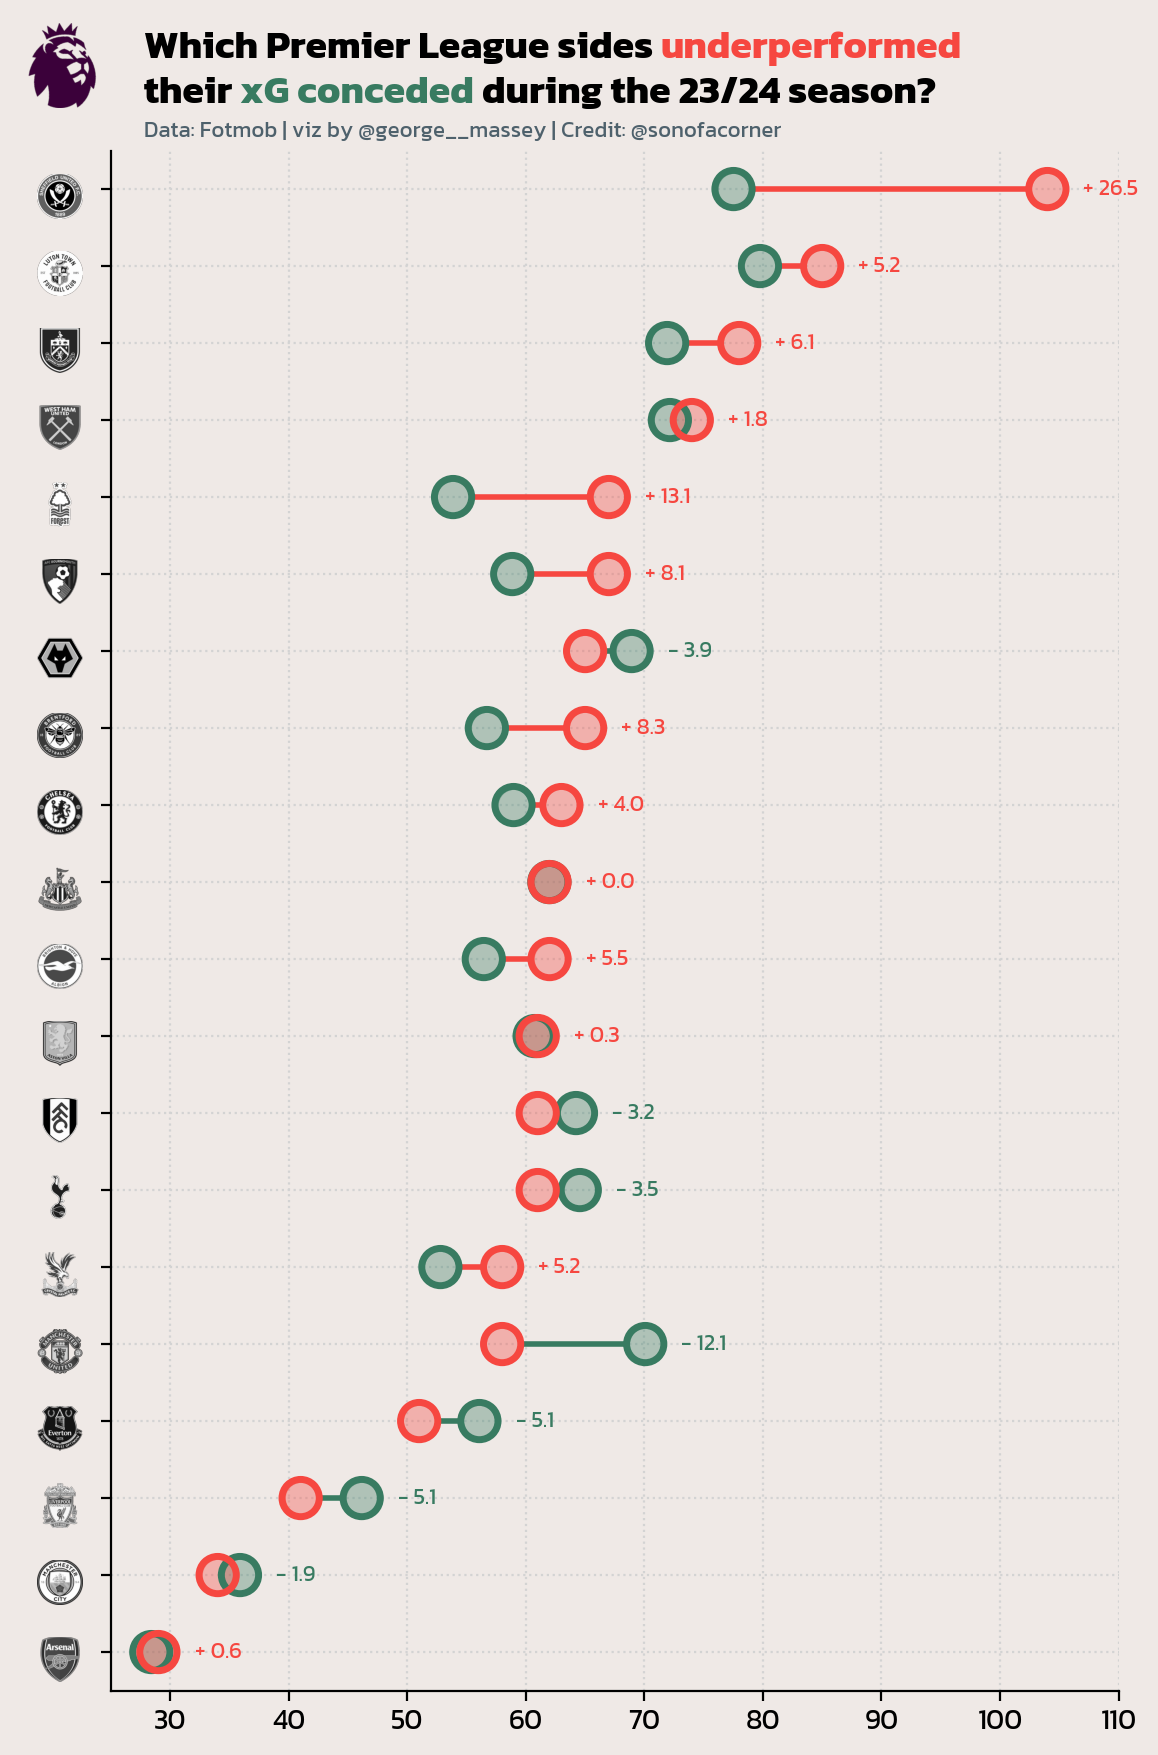

In [79]:
import numpy as np
# Adjust spines
fig = plt.figure(figsize=(6.5, 10), dpi = 200, facecolor="#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(True, color = "lightgrey", ls = ":")

# Define the series
teams = list(df["team_id"].unique())
Y = np.arange(len(teams))
X_xg = df["xG_ag"]
X_goals = df["goals_ag"]

# Fix axes limits
ax.set_ylim(-.5, len(teams) - .5)
ax.set_xlim(
    min(X_goals.min(), X_xg.min(), 25), 
    max(X_goals.max(), X_xg.max(), 110)
)

# Scatter plots
ax.scatter(X_xg, Y, color = "#387b61", s = 150, alpha = 0.35, zorder = 3)
ax.scatter(X_goals, Y, color = "#F64740", s = 150, alpha = 0.35, zorder = 3)
ax.scatter(X_xg, Y, color = "none", ec = "#387b61", s = 180, lw = 2.5, zorder = 3)
ax.scatter(X_goals, Y, color = "none", ec = "#F64740", s = 180, lw = 2.5, zorder = 3)

# Add line chart between points and difference annotation
for index in Y:
    difference = X_xg.iloc[index] - X_goals.iloc[index]
    if difference > 0:
        color = "#387b61" 
        x_adj = -1.75
        anot_position = X_xg.iloc[index]
        anot_aux_sign = "-"
    else:
        color = "#F64740"
        x_adj = 1.75
        anot_position = X_goals.iloc[index]
        anot_aux_sign = "+"
    
    ax.annotate(
        xy = (anot_position, index),
        text = f"{anot_aux_sign} {abs(difference):.1f}",
        xytext = (13, -2),
        textcoords = "offset points",
        size = 8,
        color = color,
        fontproperties = regular
    )
    
    if abs(difference) < 3.5:
        continue
    ax.plot(
        [X_xg.iloc[index] + x_adj, X_goals.iloc[index] + x_adj*(-1)],
        [index, index],
        lw = 2,
        color = color,
        zorder = 2
    )

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform

# Native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
for index, team_id in enumerate(teams):
    ax_coords = DC_to_NFC([25, index - 0.55])
    logo_ax = fig.add_axes([ax_coords[0]-0.057, ax_coords[1], 0.035, 0.035], anchor = "C")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")


# Remove tick labels
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
false_ticks = ax.set_yticklabels([])

fig_text(
    x = 0.15, y = .9, 
    s = f"Which {league} sides <underperformed>\ntheir <xG conceded> during the 23/24 season?",
    highlight_textprops = [
        {"color": "#F64740"},
        {"color":"#387b61"}
    ],
    va = "bottom", ha = "left",
    fontsize = 14, color = "black", fontproperties = bold
)
fig_text(
	x = 0.15, y = .885, 
    s = "Data: Fotmob | viz by @george__massey | Credit: @sonofacorner",
	va = "bottom", ha = "left",
	fontsize = 8, color = "#4E616C", fontproperties = regular
)

# # ---- The League's logo
league_icon = Image.open(urllib.request.urlopen(f"https://images.fotmob.com/image_resources/logo/leaguelogo/47.png")) # Change number
league_ax = fig.add_axes([0.055, 0.89, 0.065, 0.065], zorder=1)
league_ax.imshow(league_icon)
league_ax.axis("off")

for label in ax.get_xticklabels():
    label.set_fontproperties(regular)
for label in ax.get_yticklabels():
    label.set_fontproperties(regular)
ax.set_facecolor('#EFE9E6')

plt.savefig(
	f"C:\\Users\\George\\Documents\\Football Analytics\\Visuals\\{league} xGA Under and Overperformers Sonofacorner.png",
	dpi = 500,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)